In [1]:
import pandas as panda
import numpy as nump
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
dataset=panda.read_csv("who_suicide_statistics.csv")
dataset.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [9]:
print(dataset.isnull().sum())

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64


In [13]:
print(dataset.count())

country        43776
year           43776
sex            43776
age            43776
suicides_no    41520
population     38316
dtype: int64


In [15]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64


In [17]:
print(dataset.head(10))
print(dataset.count())

    country  year     sex          age  suicides_no  population
24  Albania  1987  female  15-24 years         14.0    289700.0
25  Albania  1987  female  25-34 years          4.0    257200.0
26  Albania  1987  female  35-54 years          6.0    278800.0
27  Albania  1987  female   5-14 years          0.0    311000.0
28  Albania  1987  female  55-74 years          0.0    144600.0
29  Albania  1987  female    75+ years          1.0     35600.0
30  Albania  1987    male  15-24 years         21.0    312900.0
31  Albania  1987    male  25-34 years          9.0    274300.0
32  Albania  1987    male  35-54 years         16.0    308000.0
33  Albania  1987    male   5-14 years          0.0    338200.0
country        36060
year           36060
sex            36060
age            36060
suicides_no    36060
population     36060
dtype: int64


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      36060 non-null  object 
 1   year         36060 non-null  int64  
 2   sex          36060 non-null  object 
 3   age          36060 non-null  object 
 4   suicides_no  36060 non-null  float64
 5   population   36060 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [22]:
print(dataset.age.unique())

['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']


In [24]:
dataset.describe()

,year,suicides_no,population
count,36060.000000,36060.000000,3.606000e+04
mean,1998.935441,221.809956,1.699996e+06
std,10.163883,855.449442,3.697811e+06
min,1979.000000,0.000000,2.590000e+02
25%,1991.000000,2.000000,8.056600e+04
50%,2000.000000,21.000000,3.757650e+05
75%,2008.000000,116.000000,1.344900e+06
max,2016.000000,22338.000000,4.380521e+07


In [26]:
print(dataset['country'].unique())
print("Total Countries: ",len(dataset['country'].unique()))

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bermuda' 'Bosnia and Herzegovina' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cabo Verde' 'Canada' 'Cayman Islands' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominica' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland'
 'France' 'French Guiana' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guadeloupe' 'Guatemala' 'Guyana' 'Hong Kong SAR' 'Hungary' 'Iceland'
 'Iran (Islamic Rep of)' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lithuania'
 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Martinique' 'Mauritius'
 'Mayotte' 'Mexico' 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand'
 'Nicaragua' 'Norway' 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland'
 'Portugal' 'Puerto Rico' 'Qatar' 'Republic of Korea'
 'Republic of Moldova' 'Reunio

In [28]:
print(dataset.groupby(['year']).sum())

                                                country  \
year                                                      
1979  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   
1980  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   
1981  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   
1982  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   
1983  Antigua and BarbudaAntigua and BarbudaAntigua ...   
1984  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   
1985  Antigua and BarbudaAntigua and BarbudaAntigua ...   
1986  Antigua and BarbudaAntigua and BarbudaAntigua ...   
1987  AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...   
1988  AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...   
1989  AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...   
1990  Antigua and BarbudaAntigua and BarbudaAntigua ...   
1991  Antigua and BarbudaAntigua and BarbudaAntigua ...   
1992  AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...   
1993  AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba... 

sex
female    1894294.0
male      6104173.0
Name: suicides_no, dtype: float64


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Male/Female'}, xlabel='sex'>

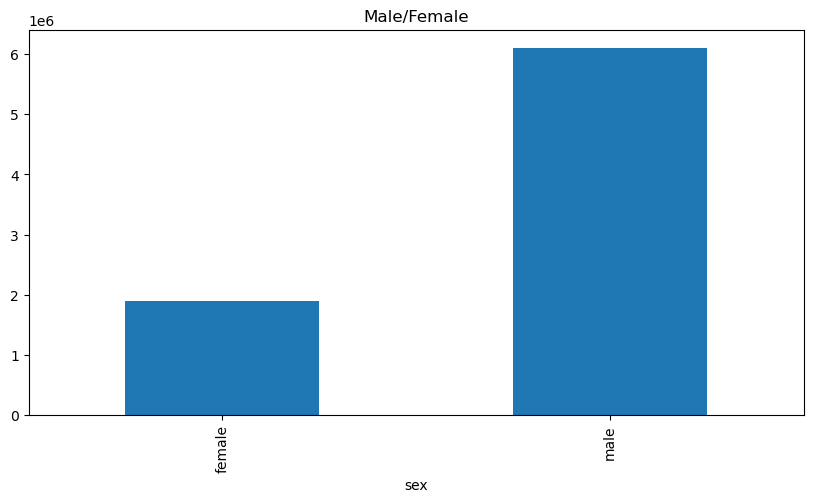

In [30]:
print(dataset.groupby('sex')['suicides_no'].sum())
dataset.groupby('sex')['suicides_no'].sum().plot.bar(figsize=(10,5),title = "Male/Female")

age
15-24 years     975700.0
25-34 years    1360780.0
35-54 years    2887740.0
5-14 years       62320.0
55-74 years    1955150.0
75+ years       756777.0
Name: suicides_no, dtype: float64


<Axes: title={'center': 'Agewise comparison'}, xlabel='age'>

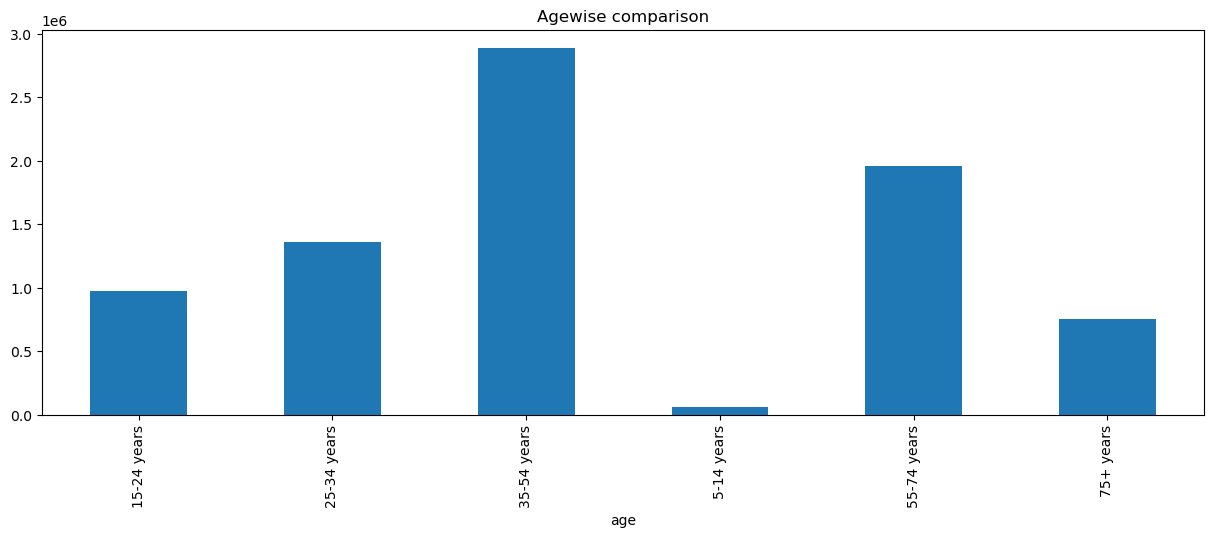

In [36]:
print(dataset.groupby('age')['suicides_no'].sum())
dataset.groupby('age')['suicides_no'].sum().sort_index().plot.bar(figsize=(15,5),title = "Agewise comparison")

<Axes: xlabel='country'>

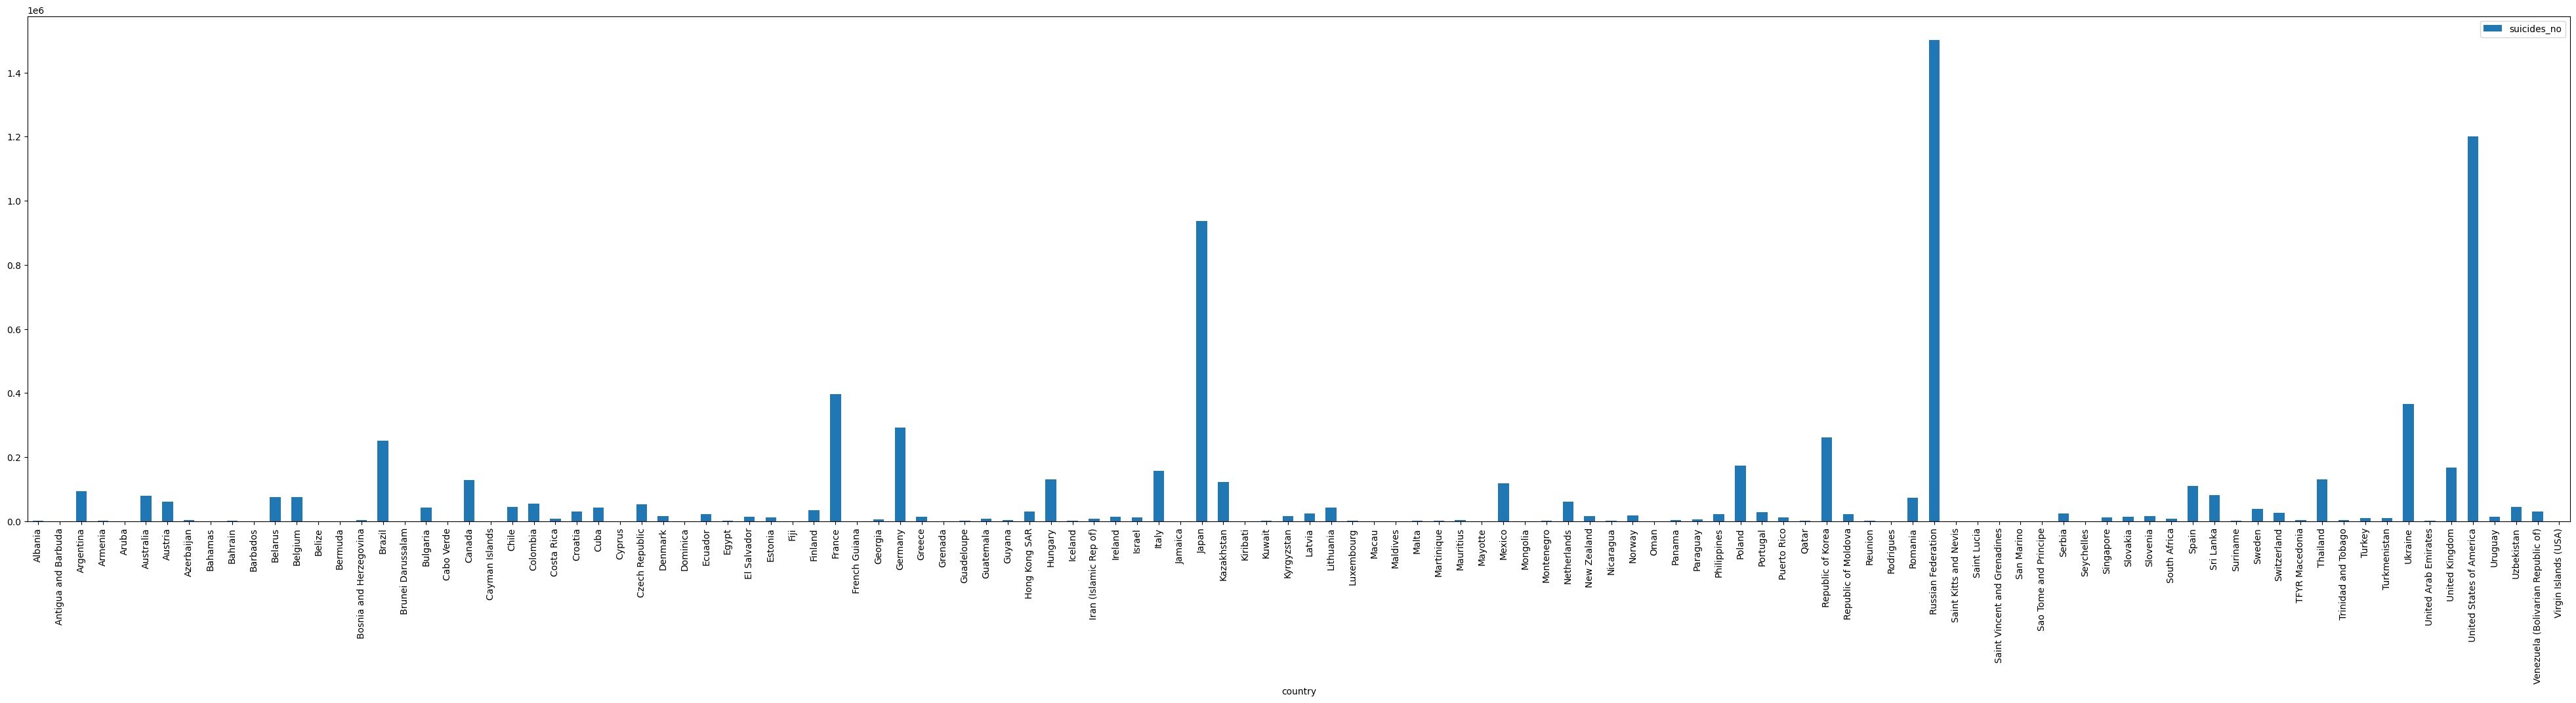

In [38]:
dataset[['country','suicides_no']].groupby(['country']).sum().plot(kind='bar',figsize=(50,10),label="Total Suicies Per country in following Year")

<Axes: title={'center': 'Top 5 countries with highest Suicide Rate'}, xlabel='country'>

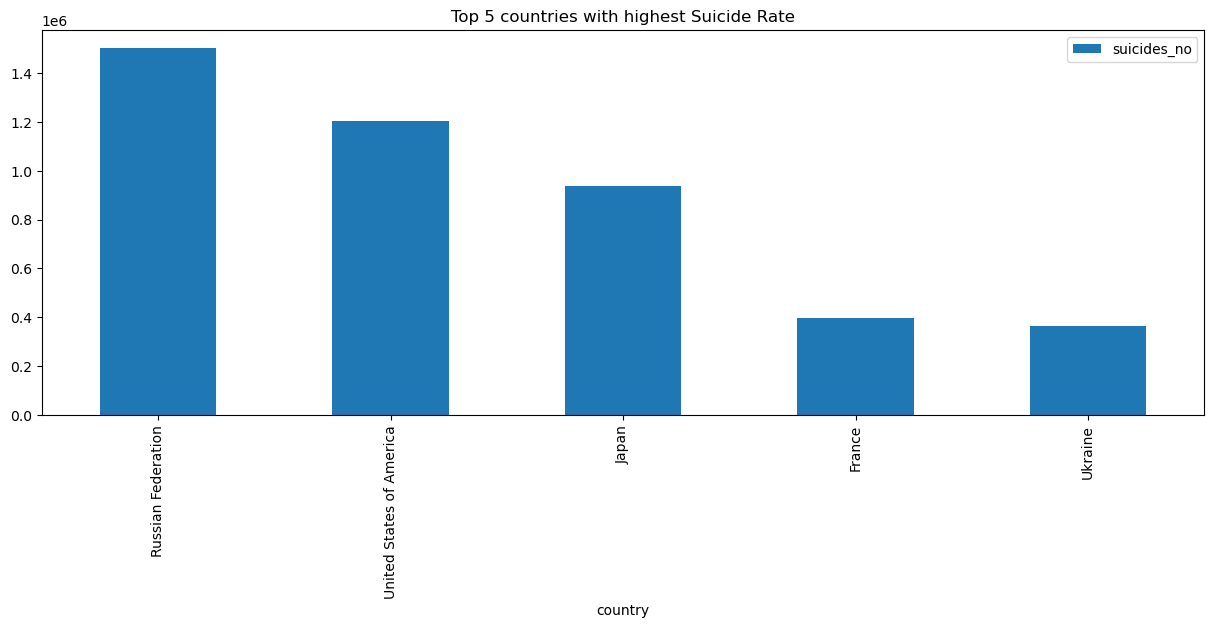

In [40]:
c_suicides=dataset[['country','suicides_no']].groupby(['country']).sum()
c_suicides = c_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top_5 = c_suicides[:5]
top_5.plot(kind='bar',figsize=(15,5),title="Top 5 countries with highest Suicide Rate",x='country',y='suicides_no')

<Axes: title={'center': 'Suicide Rate'}, xlabel='year'>

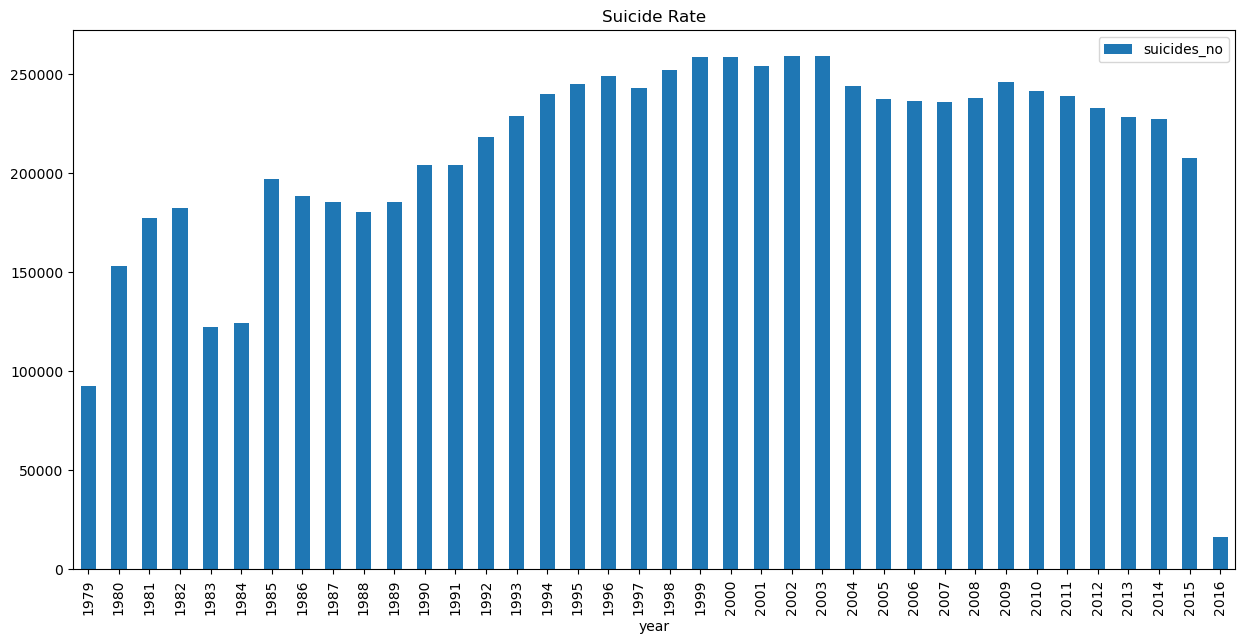

In [42]:
dataset[['year','suicides_no']].groupby(['year']).sum().plot(kind='bar',figsize=(15,7),title="Suicide Rate")

In [46]:
mydata=dataset
mydata=mydata.drop(['country'],axis=1)#removed country column from 'mydata'
#replacing age groups with integer values
mydata['age']=mydata['age'].replace('5-14 years',0)
mydata['age']=mydata['age'].replace('15-24 years',1)
mydata['age']=mydata['age'].replace('25-34 years',2)
mydata['age']=mydata['age'].replace('35-54 years',3)
mydata['age']=mydata['age'].replace('55-74 years',4)
mydata['age']=mydata['age'].replace('75+ years',5)
mydata['sex']=mydata['sex'].replace('female',0)
mydata['sex']=mydata['sex'].replace('male',1)

#adding two more columns for model training and testing

mydata['suicides/100k_population']=(mydata.suicides_no/mydata.population)/100000
mydata['fatality_rate']=nump.where(mydata['suicides/100k_population']>mydata['suicides/100k_population'].mean(),0,1)

In [54]:
X = nump.array(mydata.drop(['fatality_rate', 'suicides/100k_population'], axis= 1))
y=nump.array(mydata.fatality_rate)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

from sklearn import utils
from sklearn import preprocessing
from sklearn import metrics
#Encoing labels for continous and multi class output
label_enc=preprocessing.LabelEncoder()
trs=label_enc.fit_transform(y_train)


print("Shape of x_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (27045, 5)
Shape of y_train:  (27045,)
Shape of x_test:  (9015, 5)
Shape of y_test:  (9015,)


In [56]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
print('Logistic Regression : {:.3f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic Regression : 0.999


In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,trs)
model.predict(X_test)

print('Decision Tree ',accuracy_score(y_test,model.predict(X_test)))

Decision Tree  0.9915696062118691


In [60]:
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier(n_estimators=100,random_state=42)
mod.fit(X_train,trs)
mod.predict(X_test)
print("Random Forest accuracy is: ",accuracy_score(y_test,mod.predict(X_test)))

Random Forest accuracy is:  0.9904603438713255


In [62]:
from sklearn.metrics import classification_report
print(classification_report(logreg.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2785
           1       1.00      1.00      1.00      6230

    accuracy                           1.00      9015
   macro avg       1.00      1.00      1.00      9015
weighted avg       1.00      1.00      1.00      9015



In [64]:
print(classification_report(mod.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2789
           1       0.99      0.99      0.99      6226

    accuracy                           0.99      9015
   macro avg       0.99      0.99      0.99      9015
weighted avg       0.99      0.99      0.99      9015



In [66]:
print(classification_report(model.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2785
           1       0.99      0.99      0.99      6230

    accuracy                           0.99      9015
   macro avg       0.99      0.99      0.99      9015
weighted avg       0.99      0.99      0.99      9015

